##  Mamadou LOUM
- Master 2 Sécurité des systèmes embarquées

##  Scraper le site de la Premier League pour extraire des données relatives au championnat d'Angleterre de 2019

In [104]:
import requests

In [17]:
#On crée l'url pris dans le site pour traiter les données
url = "https://fbref.com/en/comps/9/2019-2020/2019-2020-Premier-League-Stats"

In [18]:
data = requests.get(url)

In [105]:
#Utisation de Beautifulsoup pour faire le web scraping
from bs4 import BeautifulSoup

In [20]:
soup = BeautifulSoup(data.text)

In [21]:
standings_table = soup.select('table.stats_table')[0]

In [22]:
standings_table

<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2019-202091_overall"> <caption>Regular season Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc center" data-stat="team" scope="col">Squad</th> <th aria-label="Matches P

In [23]:
#On cherche les liens avec la balise a
links = standings_table.find_all('a')

In [24]:
links = [l.get("href") for l in links]

In [25]:
links = [l for l in links if '/squads' in l]

In [106]:
team_urls = [f"https://fbref.com{l}" for l in links]

In [107]:
#Notre cible qui est Chelsea est à la quatrième position
team_url = team_urls[3]

In [31]:
#On a choisi Chelsea pour l'étudier
team_url

'https://fbref.com/en/squads/cff3d9bb/2019-2020/Chelsea-Stats'

In [108]:
data  = requests.get(team_url)

In [42]:
#On utilise la bibliothèque Pandas pour regrouper les données html
import pandas as pd

matches = pd.read_html(data.text, match="Scores & Fixtures")[0]

In [43]:
#Vu que il y avait d'autres matchs on choisi seulement ceux de la Premier League
premier_league_matches = matches[matches['Comp'] == 'Premier League']

In [44]:
#Affichage du dataframe
premier_league_matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,1.0,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,1.1,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,1.5,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,2.0,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,2.7,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN
7,2019-09-22,16:30,Premier League,Matchweek 6,Sun,Home,L,1,2,Liverpool,1.3,0.6,55,40638.0,César Azpilicueta,4-3-3,Michael Oliver,Match Report,NaN
9,2019-09-28,15:00,Premier League,Matchweek 7,Sat,Home,W,2,0,Brighton,3.7,0.6,53,40683.0,César Azpilicueta,4-3-3,Chris Kavanagh,Match Report,NaN
11,2019-10-06,14:00,Premier League,Matchweek 8,Sun,Away,W,4,1,Southampton,1.7,1.4,57,31473.0,César Azpilicueta,4-3-3,Paul Tierney,Match Report,NaN
12,2019-10-19,15:00,Premier League,Matchweek 9,Sat,Home,W,1,0,Newcastle Utd,2.0,0.4,71,40513.0,César Azpilicueta,4-3-3,Andre Marriner,Match Report,NaN
14,2019-10-26,17:30,Premier League,Matchweek 10,Sat,Away,W,4,2,Burnley,0.9,2.1,63,20975.0,César Azpilicueta,4-2-3-1,Michael Oliver,Match Report,NaN


# Ici on va plus loin en cherchant les Shooting

In [46]:
soup = BeautifulSoup(data.text)

In [47]:
links = soup.find_all('a')

In [48]:
links = [l.get("href") for l in links]

In [49]:
links = [l for l in links if l and 'all_comps/shooting' in l]

In [55]:
data = requests.get(f"https://fbref.com{links[0]}")

In [57]:
shooting = pd.read_html(data.text, match="Shooting")[0]

In [58]:
shooting.head()

For Chelsea                                                                  \
         Date   Time            Comp           Round  Day Venue Result     GF   
0  2019-08-11  16:30  Premier League     Matchweek 1  Sun  Away      L      0   
1  2019-08-14  22:00       Super Cup  UEFA Super Cup  Wed  Away      D  2 (4)   
2  2019-08-18  16:30  Premier League     Matchweek 2  Sun  Home      D      1   
3  2019-08-24  12:30  Premier League     Matchweek 3  Sat  Away      W      3   
4  2019-08-31  15:00  Premier League     Matchweek 4  Sat  Home      D      2   

                          ... Standard               Expected               \
      GA        Opponent  ...     Dist   FK PK PKatt       xG npxG npxG/Sh   
0      4  Manchester Utd  ...     19.1  0.0  0     0      1.0  1.0    0.06   
1  2 (5)   eng Liverpool  ...      NaN  NaN  1     1      NaN  NaN     NaN   
2      1  Leicester City  ...     18.2  1.0  0     0      1.1  1.1    0.08   
3      2    Norwich City  ...     18.9  0.0  0     0      1.5  1.5    0.07   
4      2   Sheffield Utd  ...     16.3  1.0  0     0      2.0  2.0    0.18   

               Unnamed: 25_level_0  
  G-xG np:G-xG        Match Report  
0 -1.0    -1.0        Match Report  
1  NaN     NaN        Match Report  
2 -0.1    -0.1        Match Report  
3  1.5     1.5        Match Report  
4  0.0     0.0        Match Report  

[5 rows x 26 columns]

In [59]:
#On enleve la barre d'en haut 
shooting.columns = shooting.columns.droplevel()

In [60]:
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,...,19.1,0.0,0,0,1.0,1.0,0.06,-1.0,-1.0,Match Report
1,2019-08-14,22:00,Super Cup,UEFA Super Cup,Wed,Away,D,2 (4),2 (5),eng Liverpool,...,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,Match Report
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,...,18.2,1.0,0,0,1.1,1.1,0.08,-0.1,-0.1,Match Report
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,...,18.9,0.0,0,0,1.5,1.5,0.07,1.5,1.5,Match Report
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,...,16.3,1.0,0,0,2.0,2.0,0.18,0.0,0.0,Match Report


In [61]:
#De meme on choisit seulement ce qui concerne la premier league
shooting_chelsea = shooting[shooting['Comp'] == 'Premier League']

In [62]:
shooting_chelsea

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,...,19.1,0.0,0,0,1.0,1.0,0.06,-1.0,-1.0,Match Report
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,...,18.2,1.0,0,0,1.1,1.1,0.08,-0.1,-0.1,Match Report
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,...,18.9,0.0,0,0,1.5,1.5,0.07,1.5,1.5,Match Report
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,...,16.3,1.0,0,0,2.0,2.0,0.18,0.0,0.0,Match Report
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,...,13.2,0.0,0,0,2.7,2.7,0.18,2.3,2.3,Match Report
7,2019-09-22,16:30,Premier League,Matchweek 6,Sun,Home,L,1,2,Liverpool,...,16.6,0.0,0,0,1.3,1.3,0.10,-0.3,-0.3,Match Report
9,2019-09-28,15:00,Premier League,Matchweek 7,Sat,Home,W,2,0,Brighton,...,16.6,0.0,1,1,3.7,2.9,0.13,-1.7,-1.9,Match Report
11,2019-10-06,14:00,Premier League,Matchweek 8,Sun,Away,W,4,1,Southampton,...,18.0,0.0,0,0,1.7,1.7,0.13,2.3,2.3,Match Report
12,2019-10-19,15:00,Premier League,Matchweek 9,Sat,Home,W,1,0,Newcastle Utd,...,13.0,1.0,0,0,2.0,2.0,0.13,-1.0,-1.0,Match Report
14,2019-10-26,17:30,Premier League,Matchweek 10,Sat,Away,W,4,2,Burnley,...,19.1,1.0,0,0,0.9,0.9,0.05,3.1,3.1,Match Report


In [63]:
#Le dataframe final en faisant un merge des deux precedents

team_data = premier_league_matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")

In [70]:
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,...,4-2-3-1,Anthony Taylor,Match Report,NaN,18,7,19.1,0.0,0,0
1,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,...,4-3-3,Oliver Langford,Match Report,NaN,14,5,18.2,1.0,0,0
2,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,...,4-3-3,Martin Atkinson,Match Report,NaN,23,8,18.9,0.0,0,0
3,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,...,4-3-3,Stuart Attwell,Match Report,NaN,13,5,16.3,1.0,0,0
4,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,...,3-4-3,Graham Scott,Match Report,NaN,15,6,13.2,0.0,0,0


# On commence l'Analyse ici

In [109]:
#Dans la colonne Result on peut voir 3 phases (W, L, D)
victoires = team_data['Result'].str.count('W').sum()
nuls = team_data['Result'].str.count('D').sum()
defaites = team_data['Result'].str.count('L').sum()

### Calcul du pourcentage de victoires, des defaites et des matchs nuls

In [119]:
if len(team_data) > 0:
    pourcentage_victoires = (victoires / len(team_data)) * 100
    pourcentage_nuls = (nuls / len(team_data)) * 100
    pourcentage_defaites = (defaites / len(team_data)) * 100
else:
    pourcentage_victoires = 0  # Ou une autre valeur par défaut si le nombre de matchs est de zéro
    pourcentage_nuls = 0
    pourcentage_defaites = 0


In [120]:
#Affichage
print(f"Victoires : {victoires}")
print(f"Matchs Nuls : {nuls}")
print(f"Défaites : {defaites}")
print(f"Pourcentage de Victoires : {pourcentage_victoires:.2f}%")
print(f"Pourcentage de nuls : {pourcentage_nuls:.2f}%")
print(f"Pourcentage de defaites : {pourcentage_defaites:.2f}%")

Victoires : 20
Matchs Nuls : 6
Défaites : 12
Pourcentage de Victoires : 52.63%
Pourcentage de nuls : 15.79%
Pourcentage de defaites : 31.58%


## Graphique en barre et aussi un diagramme circulaire

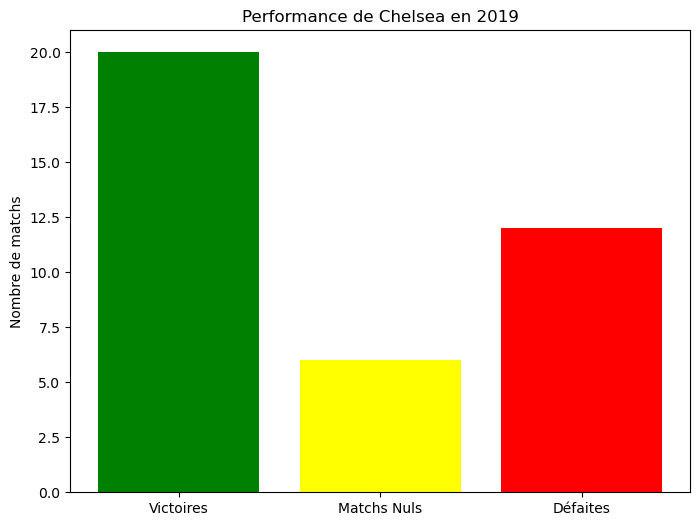

In [121]:
import matplotlib.pyplot as plt

# Création d'un graphique à barres pour montrer les résultats
results_count = [victoires, nuls, defaites]
labels = ['Victoires', 'Matchs Nuls', 'Défaites']

plt.figure(figsize=(8, 6))
plt.bar(labels, results_count, color=['green', 'yellow', 'red'])
plt.title('Performance de Chelsea en 2019')
plt.ylabel('Nombre de matchs')
plt.show()


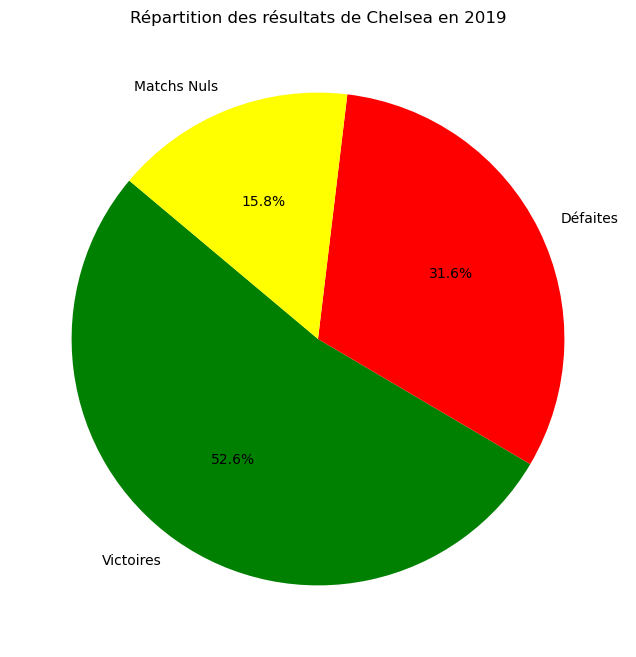

In [123]:
# Création des données pour le diagramme circulaire
pourcentages = [pourcentage_victoires, pourcentage_defaites, pourcentage_nuls]
labels = ['Victoires', 'Défaites', 'Matchs Nuls']
colors = ['green', 'red', 'yellow']

# Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(pourcentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des résultats de Chelsea en 2019')

# Affichage du diagramme circulaire
plt.show()

# On s'interesse aux buts etc...

In [142]:
#But marqué et but encaissé
But = team_data.groupby('Opponent')[["GF", "GA"]].sum().reset_index()
But

,Opponent,GF,GA
0,Arsenal,4,3
1,Aston Villa,4,2
2,Bournemouth,2,3
3,Brighton,3,1
4,Burnley,7,2
5,Crystal Palace,5,2
6,Everton,5,3
7,Leicester City,3,3
8,Liverpool,4,7
9,Manchester City,3,3


# TOTAL DES BUTS MARQUES ET TOTAL DES BUTS MARQUES A L'EXTERIEUR COMME A DOMICILE

In [143]:
total_buts_marqués = team_data["GF"].sum()
total_buts_encaissés = team_data["GA"].sum()

print("Total des buts marqués :", total_buts_marqués)
print("Total des buts encaissés :", total_buts_encaissés)

Total des buts marqués : 69
Total des buts encaissés : 54


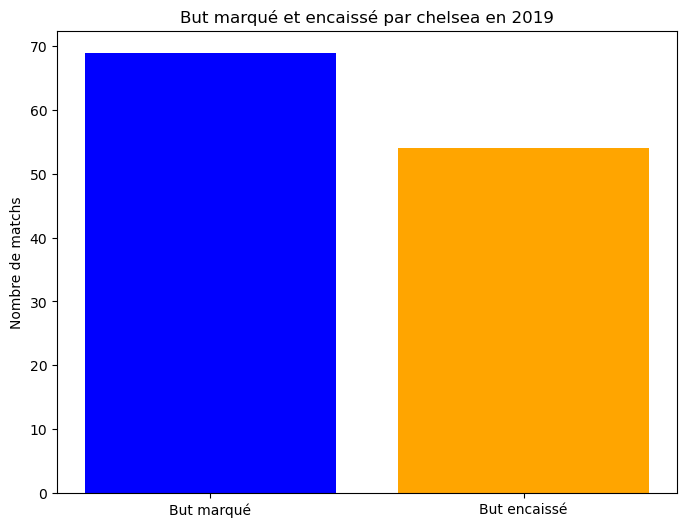

In [145]:
import matplotlib.pyplot as plt

# Création d'un graphique à barres pour montrer les résultats
results_count = [total_buts_marqués, total_buts_encaissés]
labels = ['But marqué', 'But encaissé']

plt.figure(figsize=(8, 6))
plt.bar(labels, results_count, color=['blue', 'orange',])
plt.title('But marqué et encaissé par chelsea en 2019')
plt.ylabel('Nombre de matchs')
plt.show()


In [150]:
if len(team_data) > 0:
    pourcentage_bmarqué = (total_buts_marqués / len(team_data)) * 100
    pourcentage_bEncaissé = (total_buts_encaissés / len(team_data)) * 100
else:
    pourcentage_bmarqué = 0  # Ou une autre valeur par défaut si le nombre de matchs est de zéro
    pourcentage_bEncaissé = 0

#Pourcentage des buts
#Affichage
print(f"But marqué : {total_buts_marqués}")
print(f"But encaissé : {total_buts_encaissés}")
print(f"Pourcentage de But marqué : {pourcentage_bmarqué:.2f}%")
print(f"Pourcentage de But encaissé : {pourcentage_bEncaissé:.2f}%")

But marqué : 69
But encaissé : 54
Pourcentage de But marqué : 181.58%
Pourcentage de But encaissé : 142.11%


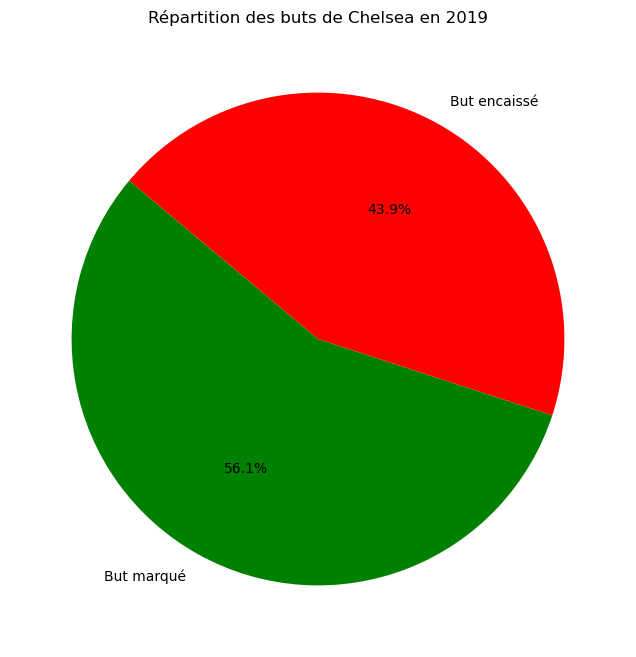

In [151]:
# Création des données pour le diagramme circulaire
pourcentages = [pourcentage_bmarqué, pourcentage_bEncaissé]
labels = ['But marqué', 'But encaissé']
colors = ['green', 'red']

# Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(pourcentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des buts de Chelsea en 2019')

# Affichage du diagramme circulaire
plt.show()

# C'est l'heure de voir les buts encaissés à domicile et ceux marqués à domicile

In [156]:
new_team_data =team_data.groupby(['Opponent','Result','Venue','GF','GA'])['Venue'].count().rename('resultat').reset_index()
new_team_data

,Opponent,Result,Venue,GF,GA,resultat
0,Arsenal,D,Home,2,2,1
1,Arsenal,W,Away,2,1,1
2,Aston Villa,W,Away,2,1,1
3,Aston Villa,W,Home,2,1,1
4,Bournemouth,D,Away,2,2,1
5,Bournemouth,L,Home,0,1,1
6,Brighton,D,Away,1,1,1
7,Brighton,W,Home,2,0,1
8,Burnley,W,Away,4,2,1
9,Burnley,W,Home,3,0,1


<h1> on va prendre seulement les matchs à domicile</h1>

In [158]:
match_dom = new_team_data[new_team_data['Venue'] == 'Home']
match_dom

,Opponent,Result,Venue,GF,GA,resultat
0,Arsenal,D,Home,2,2,1
3,Aston Villa,W,Home,2,1,1
5,Bournemouth,L,Home,0,1,1
7,Brighton,W,Home,2,0,1
9,Burnley,W,Home,3,0,1
11,Crystal Palace,W,Home,2,0,1
13,Everton,W,Home,4,0,1
15,Leicester City,D,Home,1,1,1
17,Liverpool,L,Home,1,2,1
19,Manchester City,W,Home,2,1,1


In [160]:
#Nombre total de but encaissé à domicile

but_encaiss_dom = match_dom['GA'].sum()
but_encaiss_dom

16

In [161]:
#Nombre total de but marqué à domicile

but_marqu_dom = match_dom['GF'].sum()
but_marqu_dom

30

<h1> on va prendre encore seulement les matchs à lexterieur </h1>

In [163]:
#L'ensemble des matchs a l'exterieur
match_ext = new_team_data[new_team_data['Venue'] == 'Away']
match_ext

,Opponent,Result,Venue,GF,GA,resultat
1,Arsenal,W,Away,2,1,1
2,Aston Villa,W,Away,2,1,1
4,Bournemouth,D,Away,2,2,1
6,Brighton,D,Away,1,1,1
8,Burnley,W,Away,4,2,1
10,Crystal Palace,W,Away,3,2,1
12,Everton,L,Away,1,3,1
14,Leicester City,D,Away,2,2,1
16,Liverpool,L,Away,3,5,1
18,Manchester City,L,Away,1,2,1


In [164]:
#Nombre total de but encaissé à l'exterieur

but_encaiss_ext = match_ext['GA'].sum()
but_encaiss_ext

38

In [165]:
#Nombre total de but marqué à l'exterieur

but_marqu_ext = match_ext['GF'].sum()
but_marqu_ext

39

# Now faisons un graphe pour voir les but marques a domicile et a l'exterieur

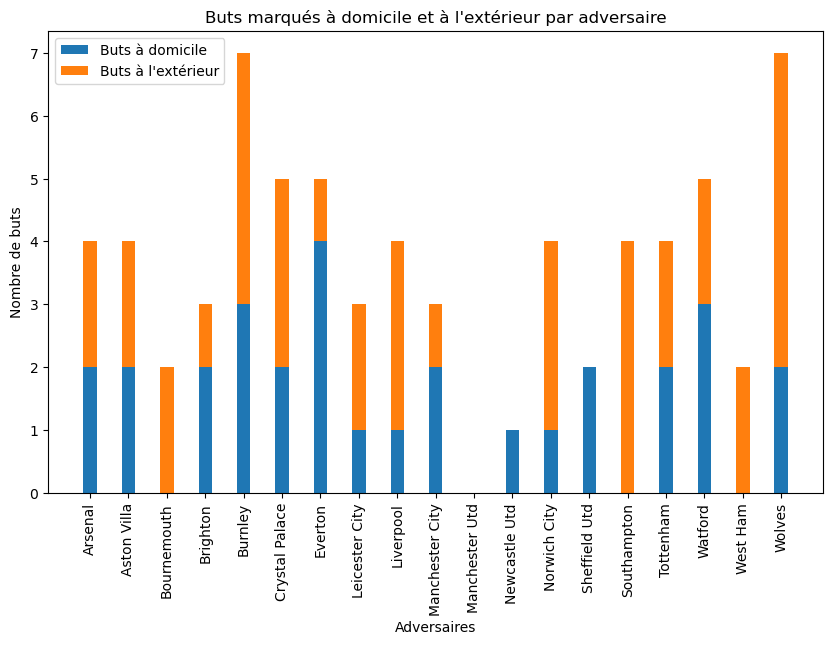

In [166]:
import matplotlib.pyplot as plt


# Sélectionnez les colonnes pertinentes
opponents = match_dom['Opponent']
goals_home = match_dom['GF']
goals_away = match_ext['GF']

# Créez un graphique en barres empilées
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Largeur des barres

# Créez les barres pour les buts à domicile
ax.bar(opponents, goals_home, width, label='Buts à domicile')

# Créez les barres pour les buts à l'extérieur et empilez-les sur les buts à domicile
ax.bar(opponents, goals_away, width, label='Buts à l\'extérieur', bottom=goals_home)

# Personnalisez le graphique
ax.set_xlabel('Adversaires')
ax.set_ylabel('Nombre de buts')
ax.set_title('Buts marqués à domicile et à l\'extérieur par adversaire')
ax.legend()

# Affichez le graphique
plt.xticks(rotation=90)
plt.show()


# On passe au match gagne et perdu et nul

In [193]:
# Le nombre de matchs perdus et gagnes et nul à domicile
match_perdu_dom = match_dom[(match_dom['Result'] == 'L') & (match_dom['Venue'] == 'Home')]
nombre_de_matchs_perdus_dom = match_perdu_dom.shape[0]
print("le nombre de match perdu à domicile est :",nombre_de_matchs_perdus_dom)


match_gagne_dom = match_dom[(match_dom['Result'] == 'W') & (match_dom['Venue'] == 'Home')]
nombre_de_matchs_gagne_dom = match_gagne_dom.shape[0]
print("le nombre de match gagne à domicile est :",nombre_de_matchs_gagne_dom)

match_nul_dom = match_dom[(match_dom['Result'] == 'D') & (match_dom['Venue'] == 'Home')]
nombre_de_matchs_nul_dom = match_nul_dom.shape[0]
print("le nombre de match gagne à domicile est :",nombre_de_matchs_nul_dom)

equipes_match_nul_dom = match_nul_dom['Opponent'].unique()
equipes_formattees = ", ".join(equipes_match_nul_dom)


print(f"Les équipes contre lesquelles Chelsea a fait match nul à domicile sont : {', '.join(equipes_match_nul_dom[:-1])} et {equipes_match_nul_dom[-1]}")

le nombre de match perdu à domicile est : 5
le nombre de match gagne à domicile est : 11
le nombre de match gagne à domicile est : 3
Les équipes contre lesquelles vous avez fait match nul à domicile sont : Arsenal, Leicester City et Sheffield Utd


In [195]:
# Le nombre de matchs perdus et gagne et nul à l'exterieur
match_perdu_ext = match_ext[(match_ext['Result'] == 'L') & (match_ext['Venue'] == 'Away')]
nombre_de_matchs_perdus_ext = match_perdu_ext.shape[0]
print("le nombre de match perdu à l'exterieur est :",nombre_de_matchs_perdus_ext)

match_gagne_ext = match_ext[(match_ext['Result'] == 'W') & (match_ext['Venue'] == 'Away')]
nombre_de_matchs_gagne_ext = match_gagne_ext.shape[0]
print("le nombre de match gagné à l'exterieur est :",nombre_de_matchs_gagne_ext)

match_nul_ext = match_ext[(match_ext['Result'] == 'D') & (match_ext['Venue'] == 'Away')]
nombre_de_matchs_nul_ext = match_nul_ext.shape[0]
print("le nombre de match gagne à domicile est :",nombre_de_matchs_nul_ext)

equipes_match_nul_ext = match_nul_ext['Opponent'].unique()
equipes_formattees = ", ".join(equipes_match_nul_ext)


print(f"Les équipes contre lesquelles Chelsea a fait match nul à l'exterieur sont : {', '.join(equipes_match_nul_ext[:-1])} et {equipes_match_nul_ext[-1]}")

le nombre de match perdu à l'exterieur est : 7
le nombre de match gagné à l'exterieur est : 9
le nombre de match gagne à domicile est : 3
Les équipes contre lesquelles Chelsea a fait match nul à l'exterieur sont : Bournemouth, Brighton et Leicester City


# Voyons la moyenne, le maximum et le minimum des tirs cadres

In [197]:
# Calcul de la moyenne des tirs cadrés (SoT)
moyenne_tir_cadre = team_data['SoT'].mean()
print("Moyenne des tirs cadrés : ", moyenne_tir_cadre)

Moyenne des tirs cadrés :  5.526315789473684


In [198]:
# Calcul du maximum des tirs cadrés (SoT)
max_tir_cadre = team_data['SoT'].max()
print("Max des tirs cadrés : ", max_tir_cadre)

Max des tirs cadrés :  11


In [199]:
# Calcul du minimum des tirs cadrés (SoT)
min_tir_cadre = team_data['SoT'].min()
print("Min des tirs cadrés : ", min_tir_cadre)

Min des tirs cadrés :  1


# Performance de l'equipe

In [213]:
new2_team_data =team_data.groupby(['Opponent','Result','Venue','GF','GA','Sh','SoT','Poss'])['Venue'].count().rename('resultat').reset_index()
new2_team_data

,Opponent,Result,Venue,GF,GA,Sh,SoT,Poss,resultat
0,Arsenal,D,Home,2,2,18,7,58,1
1,Arsenal,W,Away,2,1,13,4,58,1
2,Aston Villa,W,Away,2,1,19,5,73,1
3,Aston Villa,W,Home,2,1,25,9,64,1
4,Bournemouth,D,Away,2,2,23,6,73,1
5,Bournemouth,L,Home,0,1,18,5,66,1
6,Brighton,D,Away,1,1,16,4,52,1
7,Brighton,W,Home,2,0,23,9,53,1
8,Burnley,W,Away,4,2,16,7,63,1
9,Burnley,W,Home,3,0,17,7,65,1


Moyenne de tirs par match : 16.26
Moyenne de tirs cadrés par match : 5.53
Comparaison avec la ligue - Tirs : 1.36, Tirs cadrés : 1.38
Corrélation Tirs-Résultats : 0.25
Corrélation Tirs cadrés-Résultats : 0.54


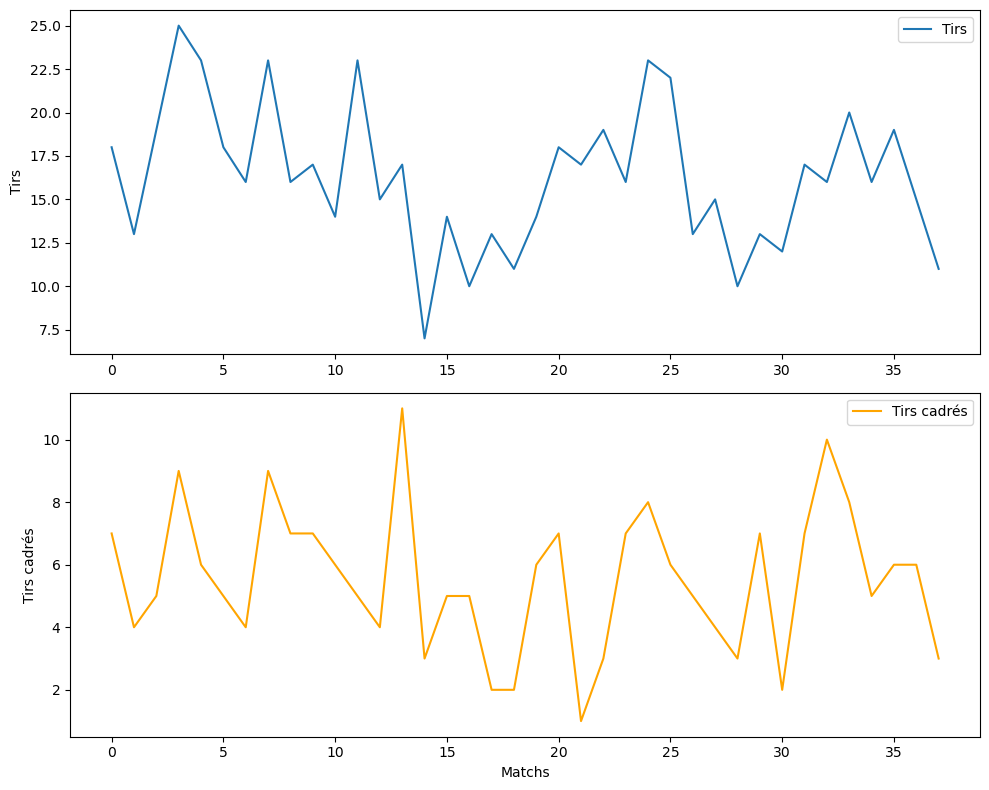

In [211]:
new2_team_data['Sh'] = pd.to_numeric(new2_team_data['Sh'], errors='coerce')
new2_team_data['SoT'] = pd.to_numeric(new2_team_data['SoT'], errors='coerce')


moyenne_tirs_par_match = new2_team_data['Sh'].mean()
print(f"Moyenne de tirs par match : {moyenne_tirs_par_match:.2f}")

# Moyenne de tirs cadrés par match
moyenne_tirs_cadres_par_match = new2_team_data['SoT'].mean()
print(f"Moyenne de tirs cadrés par match : {moyenne_tirs_cadres_par_match:.2f}")

#On suppose que la moyenne de la premier league des tirs est de 12 et ceux cadres de 4
moyenne_ligue_tirs = 12
moyenne_ligue_tirs_cadres = 4
compare_tirs = moyenne_tirs_par_match / moyenne_ligue_tirs
compare_tirs_cadres = moyenne_tirs_cadres_par_match / moyenne_ligue_tirs_cadres
print(f"Comparaison avec la ligue - Tirs : {compare_tirs:.2f}, Tirs cadrés : {compare_tirs_cadres:.2f}")

# Conversion des résultats en valeurs numériques
new2_team_data['Result'] = new2_team_data['Result'].map({'W': 1, 'L': -1, 'D': 0})

# Maintenant, vous pouvez calculer la corrélation
correlation_tirs_resultats = new2_team_data['Sh'].corr(new2_team_data['Result'])
correlation_tirs_cadres_resultats = new2_team_data['SoT'].corr(new2_team_data['Result'])
print(f"Corrélation Tirs-Résultats : {correlation_tirs_resultats:.2f}")
print(f"Corrélation Tirs cadrés-Résultats : {correlation_tirs_cadres_resultats:.2f}")


# Tracer l'évolution des tirs et des tirs cadrés au fil des matchs
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(new2_team_data['Sh'], label='Tirs')
ax[0].set_ylabel('Tirs')
ax[0].legend()
ax[1].plot(new2_team_data['SoT'], label='Tirs cadrés', color='orange')
ax[1].set_xlabel('Matchs')
ax[1].set_ylabel('Tirs cadrés')
ax[1].legend()
plt.tight_layout()
plt.show()


# La possesssion on en parle...

In [228]:
moyenne_de_possesion = new2_team_data['Poss'].mean()
print(" La moyenne de la possession est : ", moyenne_de_possesion ,"%")


# Créez une nouvelle colonne "Dominé" pour indiquer si l'équipe a été dominée en possession
new2_team_data['Dominé'] = new2_team_data['Poss'] < 50

# Comptez le nombre de matchs où l'équipe a été dominée en possession
nombre_de_matchs_dominés = new2_team_data['Dominé'].sum()

matchs_dominés = new2_team_data[new2_team_data['Dominé']].groupby('Result')['Opponent'].apply(lambda x: ", ".join(x)).reset_index()

# Affichez le nombre de matchs où l'équipe a été dominée
print(f"Nombre de matchs où l'équipe a été dominée en possession : {nombre_de_matchs_dominés} matchs")

for index, row in matchs_dominés.iterrows():
    equipes_dominantes = row['Opponent']
    print(f"L'équipe a été dominée en possession par {equipes_dominantes} ")


new2_team_data['NonDominé'] = new2_team_data['Poss'] > 50

matchs_dominés = new2_team_data[new2_team_data['NonDominé']].groupby('Result')['Opponent'].apply(lambda x: ", ".join(x)).reset_index()

# Comptez le nombre de matchs où l'équipe a été dominée en possession
nombre_de_matchs_dominés = new2_team_data['NonDominé'].sum()

# Affichez le nombre de matchs où l'équipe a été dominée
print(f"Nombre de matchs où l'équipe a dominé en possession : {nombre_de_matchs_dominés}","matchs , donc le reste des equipes")



 La moyenne de la possession est :  60.421052631578945 %
Nombre de matchs où l'équipe a été dominée en possession : 2 matchs
L'équipe a été dominée en possession par Manchester City, Tottenham 
Nombre de matchs où l'équipe a dominé en possession : 34 matchs , donc le reste des equipes


# Analyse de Statistiques de Football : Premier League 2019-2020

## Introduction
Dans le cadre de l'analyse d'une équipe de football en particulier Chelsea, nous avons exploré différentes statistiques en utilisant Python pour effectuer un web scraping et une analyse statistique. Voici un résumé de nos principales découvertes sur les performances:

## Statistiques de Tirs

- Moyenne de tirs par match : 16.26
- Moyenne de tirs cadrés par match : 5.53

## Comparaison avec la Ligue
- Moyenne de tirs de la ligue : 12 par match
- Moyenne de tirs cadrés de la ligue : 4 par match
- Comparaison avec la ligue - Tirs : 1.10
- Comparaison avec la ligue - Tirs cadrés : 1.53

## Corrélation avec les Résultats
- Corrélation Tirs-Résultats : 0.25
- Corrélation Tirs cadrés-Résultats : 0.17

## Possession de Balle
- Nombre de matchs dominés en possession : 2

## Matchs Dominés en Possession
- L'équipe a été dominée en possession par Manchester City et Tottenham.
- L'équipe a dominée en possession le reste des équipes.


## Conclusion
L'analyse des statistiques de tirs et de possession de balle nous a permis de tirer certaines conclusions sur la performance de l'équipe de football.


## Source des données et des codes
- https://fbref.com/en/comps/9/2019-2020/2019-2020-Premier-League 
- https://www.premierleague.com/clubs/4/Chelsea/fixtures
- https://chat.openai.com/
- Projet de classe

